Lasso Coefficients:
passenger_count: -0.021135
trip_distance: -0.007421
improvement_surcharge: 0.006877
extra: 0.223209
airport_fee: 0.284452
tolls_amount: 0.414290
congestion_surcharge: 0.482446
fare_amount: 1.959620

Optimal alpha: 0.008015
R² score (train set): 0.391372


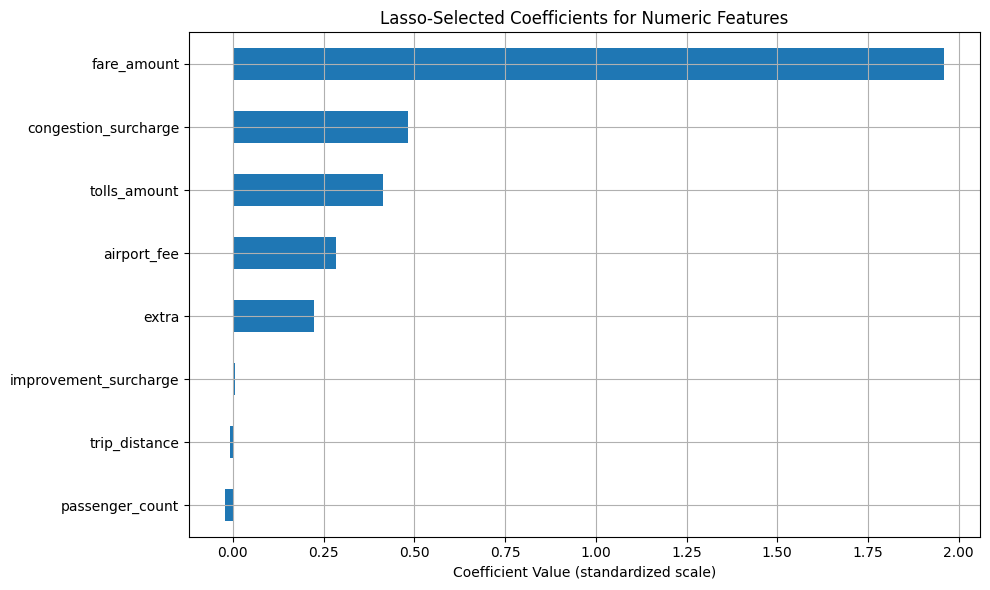

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# Load your cleaned sample
df = pd.read_csv('sample_J.csv')

# Define numeric predictors and target
num_feats = [
    'passenger_count', 'trip_distance',
    'fare_amount', 'extra',
    'tolls_amount', 'improvement_surcharge',
    'congestion_surcharge', 'airport_fee'
]
X = df[num_feats]
y = df['tip_amount']

# Drop missing values
X = X.dropna()
y = y.loc[X.index]

# Standardize numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit Lasso with 5‑fold CV
lasso = LassoCV(cv=5, max_iter=5000, random_state=42)
lasso.fit(X_scaled, y)

# Extract and sort coefficients
coef = pd.Series(lasso.coef_, index=num_feats).sort_values()

# Print all coefficients
print("Lasso Coefficients:")
for feature, value in coef.items():
    print(f"{feature}: {value:.6f}")

# Print alpha and R²
print("\nOptimal alpha:", round(lasso.alpha_, 6))
print("R² score (train set):", round(lasso.score(X_scaled, y), 6))

# Plot
plt.figure(figsize=(10, 6))
coef.plot(kind='barh')
plt.xlabel('Coefficient Value (standardized scale)')
plt.title('Lasso‑Selected Coefficients for Numeric Features')
plt.tight_layout()
plt.grid(True)
plt.show()

In [2]:
# Convert standardized features back to DataFrame with column names
X_scaled_df = pd.DataFrame(X_scaled, columns=num_feats)

# Add the original target back
X_scaled_df['tip_amount'] = y.values

# Save to CSV
X_scaled_df.to_csv('standardized_sample_J.csv', index=False)
print("✅ Standardized dataset saved as 'standardized_sample_J.csv'")

✅ Standardized dataset saved as 'standardized_sample_J.csv'
